<a href="https://colab.research.google.com/github/nestorjuarezR/Data_Science/blob/main/Proyecto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
 
import datetime
import gzip

In [2]:
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

In [3]:
url_review = '/content/drive/My Drive/Data/steam_reviews.json.gz'

In [18]:
contador = 0
data_reviews = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
n = 10
for l in parse(url_review):
    if contador%n == 0:
        data_reviews.append(l)
    else:
        pass
    contador += 1

data_reviews = pd.DataFrame(data_reviews)

In [5]:
url_games = '/content/drive/My Drive/Data/steam_games.json.gz'

In [6]:
data_games = []
for l in parse(url_games):
    data_games.append(l)
data_games = pd.DataFrame(data_games)

https://towardsdatascience.com/steam-recommendation-systems-4358917288eb

# Parte A Exploración de datos

## Reviews

In [7]:
data_reviews.head(4)

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,compensation,found_funny
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,Ariman1,13.2,1386.0,328100,2,2017-08-02,Addictive RPG ! Works fine on linux though it ...,False,1,NaN,NaN,NaN
2,freakfantom,0.1,1706.0,725280,5,2017-11-12,Прикольная стрелялка. Взял дешево на распродаже.,False,1,NaN,NaN,NaN
3,The_Cpt_FROGGY,7.8,2217.0,631920,0,2017-12-11,Somewhere on Zibylon:\n~~~~~~~~~~~~~~~~~~\nZib...,False,1,76561198003030375,Product received for free,NaN


In [8]:
data_reviews.shape

(779307, 12)

In [9]:
data_reviews.dtypes

username         object
hours           float64
products        float64
product_id       object
page_order        int64
date             object
text             object
early_access       bool
page              int64
user_id          object
compensation     object
found_funny     float64
dtype: object

In [20]:
data_reviews.dtypes

username         object
hours           float64
products        float64
product_id       object
page_order        int64
date             object
text             object
early_access       bool
page              int64
user_id          object
compensation     object
found_funny     float64
dtype: object

In [21]:
#Elimino columnas
data_reviews.drop(['page_order', 'page', 'early_access', 'compensation'], axis=1, inplace=True)

In [22]:
def valores_nulos(data):
  print('<-- Porcentaje de valores nulos -->\n')
  print(data.isnull().sum() / data.shape[0] * 100)

In [23]:
valores_nulos(data_reviews)

<-- Porcentaje de valores nulos -->

username        0.000000
hours           0.338378
products        0.200948
product_id      0.000000
date            0.000000
text            0.000000
user_id        59.279206
found_funny    84.580659
dtype: float64


In [24]:
print('Un total de {} usuarios realizaron reviews de videojuegos'.format(len(data_reviews.username.unique())))

Un total de 540341 usuarios realizaron reviews de videojuegos


In [25]:
print("<-- Top 10 de Usuarios con mas reviews -->")
data_reviews.username.value_counts().head(10)

<-- Top 10 de Usuarios con mas reviews -->


123            213
Alex           190
Chris          155
Nick           143
Matt           137
Tom            129
John           128
Jack           123
Dan            119
Saint Aaron    114
Name: username, dtype: int64

In [26]:
print('<-- Top 10 Videojuegos con mas reviews -->\n ')
top_games = data_reviews.product_id.value_counts().head(10)
i = 0
while i <= 9:
  ids = top_games.index[i]
  ids = data_games[data_games['id'] == ids]
  print('-->', ids.title.iloc[0])
  i = i + 1

<-- Top 10 Videojuegos con mas reviews -->
 
--> Team Fortress 2
--> Rust
--> Borderlands 2
--> Fallout 4
--> Grand Theft Auto V
--> Undertale
--> Portal 2
--> Warframe
--> DayZ
--> Robocraft


In [27]:
#Convertir a string columnas
columnas = ['username', 'text']
for i in columnas:
  data_reviews[i] = data_reviews[i].astype('string')

#Convertir a int64 columna product_id
data_reviews['product_id'] = data_reviews['product_id'].astype('int64')

In [28]:
#Conversion a tipo datetime64
data_reviews['Fecha'] = pd.to_datetime(data_reviews['date'])
data_reviews['Year'] = data_reviews['Fecha'].dt.year            #Nueva columna con el año del review
data_reviews['month'] = data_reviews['Fecha'].dt.month          #Nueva columna con el mes del review

In [29]:
year_review = data_reviews.groupby(['Year']).count()
year_review

,username,hours,products,product_id,date,text,user_id,found_funny,Fecha,month
Year,,,,,,,,,,
2010,1283,1250,1281,1283,1283,1283,201,46,1283,1283
2011,7421,7229,7417,7421,7421,7421,1527,226,7421,7421
2012,10349,10137,10346,10349,10349,10349,2478,340,10349,10349
2013,32888,32625,32833,32888,32888,32888,10307,1323,32888,32888
2014,118323,118320,117778,118323,118323,118323,46645,8424,118323,118323
2015,157862,156787,157682,157862,157862,157862,63348,29822,157862,157862
2016,203854,203309,203548,203854,203854,203854,84455,39105,203854,203854
2017,242121,241816,241663,242121,242121,242121,105972,40390,242121,242121
2018,5206,5197,5193,5206,5206,5206,2407,488,5206,5206


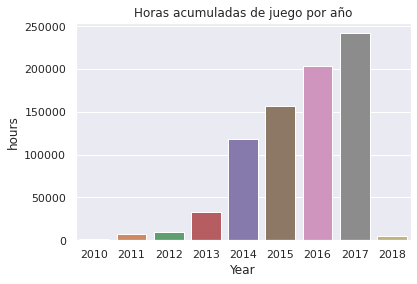

In [30]:
plt.title('Horas acumuladas de juego por año')
sns.barplot(x = year_review.index,
            y=year_review.hours)

In [31]:
months_2017 = data_reviews[data_reviews['Year'] == 2017].groupby(['month']).count()

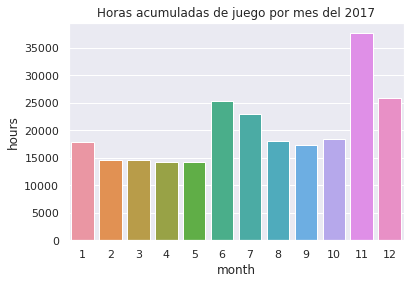

In [32]:
plt.title('Horas acumuladas de juego por mes del 2017')
sns.barplot(x= months_2017.index,
            y=months_2017.hours)

 ## Info Games

In [34]:
data_games.shape

(32135, 16)

In [35]:
data_games.dtypes

publisher          object
genres             object
app_name           object
title              object
url                object
release_date       object
tags               object
discount_price    float64
reviews_url        object
specs              object
price              object
early_access         bool
id                 object
developer          object
sentiment          object
metascore          object
dtype: object

In [36]:
data_games.drop(['reviews_url', 'url', 'early_access', 'discount_price'], axis=1, inplace=True)

In [37]:
data_games.head(2)

,publisher,genres,app_name,title,release_date,tags,specs,price,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",Free To Play,643980,Secret Level SRL,Mostly Positive,NaN


In [38]:
data_games.shape

(32135, 12)

In [39]:
valores_nulos(data_games)

<-- Porcentaje de valores nulos -->

publisher       25.056792
genres          10.216275
app_name         0.006224
title            6.379337
release_date     6.432239
tags             0.507235
specs            2.084954
price            4.285047
id               0.006224
developer       10.266065
sentiment       22.349463
metascore       91.669519
dtype: float64


In [40]:
print('<-- Desarrolladores con mas videojuegos registrados -->\n')
data_games.developer.value_counts().head(10)

<-- Desarrolladores con mas videojuegos registrados -->



Ubisoft - San Francisco       1259
SmiteWorks USA, LLC            813
Dovetail Games                 253
KOEI TECMO GAMES CO., LTD.     232
Paradox Development Studio     156
Capcom                         130
Ronimo Games                   123
Choice of Games                100
Musopia                         95
Stainless Games                 95
Name: developer, dtype: int64

Text(0, 0.5, 'Frecuencia')

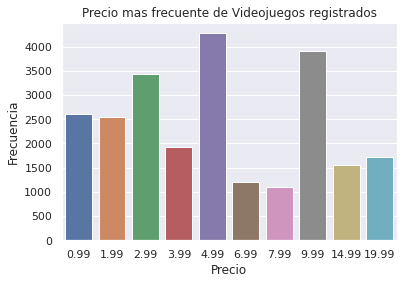

In [41]:
price_games = data_games.price.value_counts().head(10)
sns.barplot(x=price_games.index[0:],
            y=price_games)
plt.title('Precio mas frecuente de Videojuegos registrados')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

In [42]:
#Convertir a string el genero del videojuego
data_games['genres'] = data_games['genres'].astype('string')

In [43]:
data_games.genres.value_counts().head(10)

['Action']                          1880
['Action', 'Indie']                 1650
['Simulation']                      1396
['Casual', 'Simulation']            1359
['Action', 'Adventure', 'Indie']    1082
['Strategy']                        1056
['Adventure', 'Indie']              1007
['Indie', 'RPG', 'Strategy']         945
['Casual', 'Indie']                  899
['Action', 'Adventure']              762
Name: genres, dtype: Int64

# Procesamiento de lenguaje natural

In [74]:
from textblob import TextBlob
import nltk
import goslate
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
data_reviews.head(2)

,username,hours,products,product_id,date,text,user_id,found_funny,Fecha,Year,month
0,Chaos Syren,0.1,41.0,725280,2017-12-17,This would not be acceptable as an entertainme...,NaN,NaN,2017-12-17,2017,12
1,Ariman1,13.2,1386.0,328100,2017-08-02,Addictive RPG ! Works fine on linux though it ...,NaN,NaN,2017-08-02,2017,8


In [45]:
valores_nulos(data_reviews)

<-- Porcentaje de valores nulos -->

username        0.000000
hours           0.338378
products        0.200948
product_id      0.000000
date            0.000000
text            0.000000
user_id        59.279206
found_funny    84.580659
Fecha           0.000000
Year            0.000000
month           0.000000
dtype: float64



https://www.youtube.com/watch?v=oy1lcj8s8sQ&t=620s  -->PRocesamiento de comentario

https://stackoverflow.com/questions/57744725/how-to-convert-emojis-emoticons-to-their-meanings-in-python --> Convertir emojis to text


In [75]:
#Defino el modelo para traduccion
gs = goslate.Goslate()

In [59]:
  s = data_reviews.text.iloc[2]

In [60]:
TextBlob(s).translate(to = 'en')

TextBlob("Cool shooter. Took it cheap on sale.")

In [76]:
for i in range(data_reviews.shape[0]):
  reviews = data_reviews.text.iloc[i]
  data_reviews['Traduccion'] = gs.translate(reviews,'en')

HTTPError: ignored

In [68]:
pip install goslate

  Created wheel for goslate: filename=goslate-1.5.1-cp36-none-any.whl size=11550 sha256=106225a782b7a308dd4388db3e4896883c2c1350166bc6b1a87728311149cbab
  Stored in directory: /root/.cache/pip/wheels/4f/7f/28/6f52271012a7649b54b1a7adaae329b4246bbbf9d1e4f6e51a
Successfully built goslate


In [69]:
import goslate

In [72]:
text = "Hello World"

gs = goslate.Goslate()
translatedText = gs.translate(text,'es')

In [73]:
print(translatedText)

Hola Mundo


In [78]:
for i in range(data_reviews.shape[0]):
  reviews = data_reviews.text.iloc[i]
  data_reviews['Traduccion'] = TextBlob(reviews).detect_language()

TranslatorError: ignored